# Examen NLP avec python 2023

### Sujet

L'objectif de cet examen est d'analyser un corpus de textes et de le catégoriser par thématique. 

Le corpus est 20 newsgroup. Il est composé de posts de média répartis en 20 catégories différentes. 
Les données sont labellisées. 

Vous allez utiliser une approche supervisée et une approche non supervisée pour cette tâche. 

Pour la partie supervisée, vous allez utiliser un algorithme de classification de texte. Les labels fournis permettront d'apprendre à catégoriser les posts en fonction de leur thématique.

Pour la partie non-supervisée, vous allez utiliser une technique de topic modeling pour découvrir des catégories (clusters) parmi les données sans utiliser les labels fournis. Vous utiliserez uniquement le nombre de catégories existantes, qui sera le nombre de clusters que vous cherchez. 

Chacune des techniques nécessitera une étape de vectorisation et sera évaluée avec une métrique adaptée. 



---



### Consignes

Le fichier peut être exécuté au choix sur Colab, Kaggle ou sur votre envrionnement local. Colab et Kaggle sont fortement conseillés pour limiter les problèmes liés à l'installation de librairies. De plus, Le GPU peut être utilisé sur Kaggle pour limiter les temps de calcul (surtout pour l'utilisation de grands modèles).

Toutes les cellules comprenant l'emoji ➡️ sont des consignes avec différentes tâches à réaliser. 

Les cellules vides doivent être complétées. Vous pouvez ajouter autant de cellules que vous le souhaitez.

Vous n'êtes pas obligé·e·s de faire l'examen dans l'ordre. Cependant il doit être rendu dans l'ordre fourni au début et il sera exécuté dans cet ordre pour la correction. 

Attention à la mémoire tampon des notebooks. Si vous rencontrer des problèmes pendant l'examen, pensez à redémarrer l'environnement d'exécution. De même, il est conseillé d'essayer de redémarrer l'environnement d'exécution et de relancer le code avant de rendre le devoir pour vérifier que tout fonctionne.

Il est vivement recommandé d'utiliser les librairies existantes pour réaliser les différentes tâches demandées. Cependant, tous les choix de paramètres doivent être motivés. Si des paramètres inutiles ou non expliqués sont présents dans le code, cela sera pris en compte dans la notation.




---



## Import des packages

In [17]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action='ignore')
import nltk
from nltk.stem import WordNetLemmatizer

➡️ Ajouter les packages nécessaires au fur et à mesure de l'examen.

In [1]:
from sklearn.datasets import fetch_20newsgroups

## Etude des données

### Chargement

➡️ Exécuter le code suivant pour charger les données.

In [13]:
df = fetch_20newsgroups(subset='all')

### Caractéristiques

➡️ Afficher la taille du dataset

In [24]:
print(f" la Taille du dataset : {len(df.data)}")

 la Taille du dataset : 18846


➡️ Afficher le nom des catégories du dataset.

In [19]:
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Vectorisation

➡️ Séparer les données en un jeu d'entraînement et un jeu de test en réduisant le jeu d'entraînement à 1000 exemples et le jeu de test à 250 exemples pour limiter les temps de calcul.

Attentions à répartir équitablement les classes.

In [20]:
from sklearn.model_selection import train_test_split

X_train_news, x_test_news, y_train_news, y_test_news = train_test_split(news_dataset.data, news_dataset.target, train_size=1000, test_size=250, shuffle=True, stratify=news_dataset.target)

➡️ Choisir une méthode de vectorisation adaptée à la tâche à réaliser. 

➡️ Implémenter cette méthode et vectoriser l'ensemble des données.

➡️ Justifier le choix de la méthode.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_news)
x_test_tfidf = tfidf_vectorizer.transform(x_test_news)

### Justifier le choix de la méthode


Le choix du TfidfVectorizer pour la vectorisation dans le traitement automatique du langage naturel (NLP) est souvent justifié pour plusieurs raisons :

Fréquence des termes : Le TfidfVectorizer prend en compte à la fois la fréquence des termes dans un document spécifique et leur importance dans l'ensemble du corpus. Il attribue des poids plus élevés aux termes qui apparaissent fréquemment dans un document spécifique, mais moins fréquemment dans l'ensemble du corpus. Cela permet de mettre en évidence les termes distinctifs et informatifs pour chaque document.

Réduction de l'importance des termes courants : Le TfidfVectorizer applique une pondération inverse proportionnelle à la fréquence des termes dans l'ensemble du corpus. Cela signifie que les termes courants qui apparaissent dans de nombreux documents ont des poids plus faibles, car ils ne sont pas aussi informatifs que les termes rares et spécifiques à un document.

Élimination des stopwords : Les stopwords sont des mots courants tels que "et", "le", "de" qui n'apportent généralement pas beaucoup d'informations dans le contexte de l'analyse de texte. Le TfidfVectorizer permet généralement de spécifier une liste de stopwords à exclure lors de la vectorisation, ce qui permet de réduire le bruit et de se concentrer sur les termes plus significatifs.

Adaptabilité à différents corpus : Le TfidfVectorizer peut être utilisé avec différents types de corpus, qu'il s'agisse de petits ensembles de documents ou de grands corpus. Il est capable de gérer efficacement des vocabulaires importants en calculant les poids TF-IDF pour chaque terme.

Interprétabilité : Les vecteurs générés par le TfidfVectorizer peuvent être interprétés plus facilement que les représentations vectorielles alternatives. Les poids TF-IDF attribués à chaque terme donnent une indication de l'importance relative des termes dans chaque document.

## Classification supervisée

➡️ Choisir un algorithme vous paraissant pertinent pour la tâche de catégorisation de texte.

➡️ Entraîner le modèle grâce au jeu d'entraînement.

In [22]:
from sklearn import svm

SVM_tfidf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)    
SVM_tfidf.fit(X_train_tfidf,y_train_news)

SVC(gamma='auto', kernel='linear', probability=True)

➡️ Utiliser le modèle entraîné pour faire les prédictions correspondantes au jeu de test. 

➡️ Afficher les performances du modèle. 

In [23]:
Y_pred_tfidf =SVM_tfidf.predict(x_test_tfidf)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test_news, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.38      0.38      0.38        13
           2       0.73      0.62      0.67        13
           3       0.46      0.46      0.46        13
           4       0.79      0.85      0.81        13
           5       0.62      0.77      0.69        13
           6       0.71      0.92      0.80        13
           7       0.71      0.92      0.80        13
           8       1.00      0.69      0.82        13
           9       0.86      0.92      0.89        13
          10       0.86      0.92      0.89        13
          11       1.00      0.85      0.92        13
          12       0.53      0.69      0.60        13
          13       0.92      0.85      0.88        13
          14       0.92      0.85      0.88        13
          15       0.55      0.92      0.69        13
          16       0.86      0.50      0.63        12
          17       0.92    

### Matrice de confusion 

In [25]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test_news, y_pred_tfidf)
CM

array([[ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  1],
       [ 0,  7,  2,  1,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  7,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  0,  0,  8,  3,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  1,  6,  3,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 10,  1,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, 11,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 11,  2,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 12,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

➡️ Recommencer la partie classification avec SOIT :
- une autre technique de vectorisation de votre choix
- une étape de pre-processing à appliquer avant de reproduire la même vectorisation. 

Les jeux d'entraînement et de test doivent rester les mêmes pour que la comparaison soit la plus pertinente possible. Le modèle de classification choisi ne doit pas changer non plus, seule la technique de vectorisation ou l'ajout de l'étape de pre-processing change. 

➡️ Commenter les résultats obtenus. Tenter d'expliquer la différence de performance s'il y en a une.

In [32]:
### La méthode BOW
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train_news)
x_test_bow = bow_vectorizer.transform(x_test_news)

In [33]:
from sklearn import svm

SVM_bow = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)    
SVM_bow.fit(X_train_bow,y_train_news)

SVC(gamma='auto', kernel='linear', probability=True)

In [34]:
Y_pred_bow =SVM_bow.predict(x_test_bow)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test_news, Y_pred_bow))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.36      0.38      0.37        13
           2       0.45      0.38      0.42        13
           3       0.56      0.38      0.45        13
           4       0.38      0.38      0.38        13
           5       0.40      0.46      0.43        13
           6       0.43      0.77      0.56        13
           7       0.50      0.46      0.48        13
           8       0.54      0.54      0.54        13
           9       0.44      0.54      0.48        13
          10       0.65      0.85      0.73        13
          11       0.32      0.54      0.40        13
          12       0.22      0.15      0.18        13
          13       0.44      0.31      0.36        13
          14       0.70      0.54      0.61        13
          15       0.58      0.54      0.56        13
          16       0.45      0.42      0.43        12
          17       0.78    

In [38]:
from sklearn.metrics import confusion_matrix
CM2 = confusion_matrix(y_test_news, Y_pred_bow)
CM2

array([[ 7,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  1,  1],
       [ 0,  5,  1,  1,  0,  1,  3,  1,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  5,  0,  2,  1,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,
         1,  0,  0,  0],
       [ 0,  1,  1,  5,  3,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  2,  5,  1,  3,  0,  0,  0,  0,  1,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  2,  1,  0,  0,  6,  1,  0,  0,  0,  0,  0,  1,  0,  2,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 10,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  1,  0,  0,  2,  6,  1,  0,  0,  1,  0,  0,  0,  0,
         1,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  7,  1,  0,  1,  1,  0,  0,  1,
         0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  1,  0,  7,  2,  0,  0,  0,  0,  0,
         1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1

###  TF-IDF donne de meilleurs résultats que BoW lorsqu'il est utilisé avec un SVM selon le résultats de mes métrics. 

Voici quelques raisons pour lesquelles TF-IDF peut être préféré pour la classification avec SVM :

Gestion des termes fréquents : TF-IDF permet de réduire l'importance des termes courants qui apparaissent dans de nombreux documents, car ils sont moins discriminants. Cela peut aider à atténuer l'impact des mots fréquents qui n'apportent pas beaucoup d'informations distinctives pour la classification.

Mise en évidence des termes spécifiques : TF-IDF met davantage l'accent sur les termes rares et spécifiques à un document. Ces termes peuvent être plus informatifs et fournir des indices précieux pour la classification.

Pondération par importance globale : TF-IDF prend en compte l'importance globale d'un terme dans l'ensemble du corpus. Ainsi, les termes qui sont importants pour un sous-ensemble spécifique de documents, mais pas pour l'ensemble du corpus, peuvent avoir des poids plus élevés. Cela peut aider à capturer des caractéristiques spécifiques à des classes ou à des catégories particulières.

Réduction du bruit : En réduisant l'importance des stopwords et des termes courants, TF-IDF peut aider à réduire le bruit dans les représentations vectorielles, permettant ainsi aux modèles de mieux se concentrer sur les caractéristiques discriminantes. *texte en italique*

## Topic Modeling

➡️ Choisir une méthode **non supervisée** permettant de faire du topic modeling. Commenter votre choix.

➡️ Implémenter cette méthode et l'exécuter sur les données vectorisées avec une des méthodes précédemment utilisée de votre choix.

Le nombre de clusters est fixé à **20**.

In [46]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=20)
lda.fit(X_train_tfidf)
y_pred_lda = lda.transform(x_test_tfidf)

### Justification du choix 
Le choix entre LDA (Latent Dirichlet Allocation)et  K-means dépend du problème spécifique que vous essayez de résoudre et des caractéristiques de vos données.

Voici quelques éléments à considérer pour chaque méthode :

LDA (Latent Dirichlet Allocation) :

LDA est un modèle probabiliste génératif qui permet de découvrir des thèmes latents à partir d'un corpus de documents.
LDA est couramment utilisé pour la modélisation de thèmes dans le domaine du NLP (Natural Language Processing).
Il est utile lorsque vous souhaitez découvrir des thèmes sous-jacents dans un ensemble de documents et attribuer des probabilités aux mots pour chaque thème.
LDA peut être interprété comme une méthode de clustering probabiliste où les documents sont affectés à plusieurs clusters (thèmes) avec des probabilités associées.
K-means :

K-means est un algorithme de clustering non supervisé qui partitionne les données en k clusters en maximisant la similarité intra-cluster et en minimisant la similarité inter-cluster.
Il est couramment utilisé pour la segmentation des données en groupes homogènes.
K-means est utile lorsque vous voulez regrouper vos données en clusters sans considérer de structure thématique sous-jacente.
Contrairement à LDA, K-means ne fournit pas de probabilités associées aux clusters.

Donc ici étant donné que mes groupes ne sont pas homogènes je prefere utiliser LDA

➡️ Afficher les mots représentatifs de chacun des clusters.

In [47]:
for index,topic in enumerate(lda.components_):
    print(f'10 mots majoritairement représentant le cluster {index} : ')
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

10 mots majoritairement représentant le cluster 0 : 
['maintenence', 'larry', 'replace', 'approached', 'gummint', 'floptical', 'irresponsible', 'anyways', 'rap', 'organs']


10 mots majoritairement représentant le cluster 1 : 
['focusing', 'iskence', '90k', 'divnity', 'debra', 'neverdid', 'placement', 'companionship', 'hindrance', 'determined']


10 mots majoritairement représentant le cluster 2 : 
['rude', 'confirm', 'fleet', 'physically', 'fishy', 'expectedwarning', '________', 'itd', 'plymouth', 'physicscommunications']


10 mots majoritairement représentant le cluster 3 : 
['engineeringin', 'accentaccent', 'ajayshah', 'pleasure', 'iscorrect', 'ownerror', 'elderlylines', 'comorganization', 'affecting', 'nuisance']


10 mots majoritairement représentant le cluster 4 : 
['ridge', 'allegro', '11111111', 'canadele', 'iol', 'burasi', 'philosophyhas', 'badapproach', 'gamescould', 'intimately']


10 mots majoritairement représentant le cluster 5 : 
['94041', 'eternally', 'gozen', 'commitsu

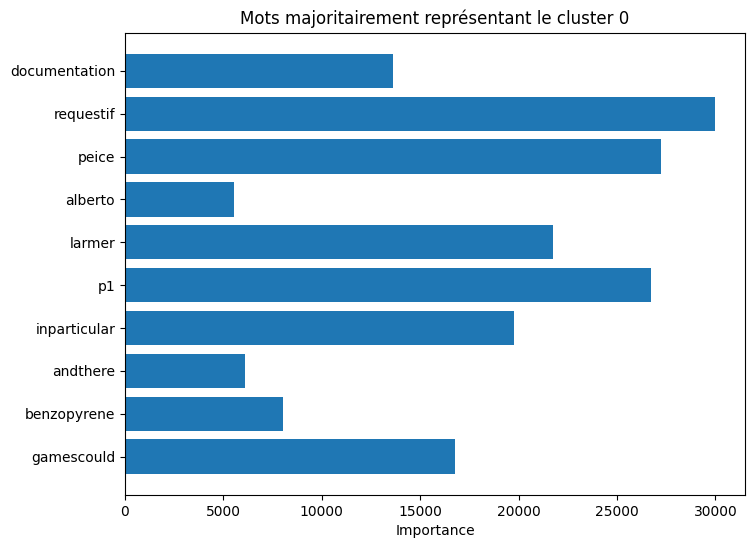

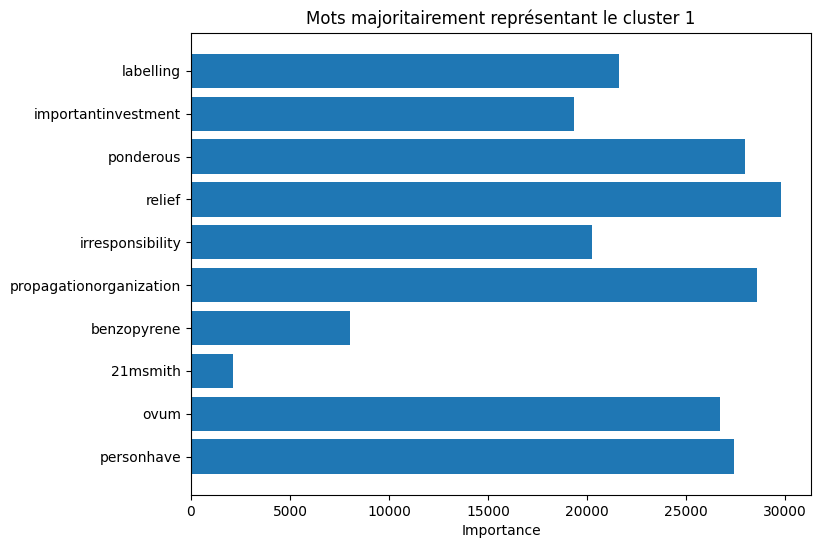

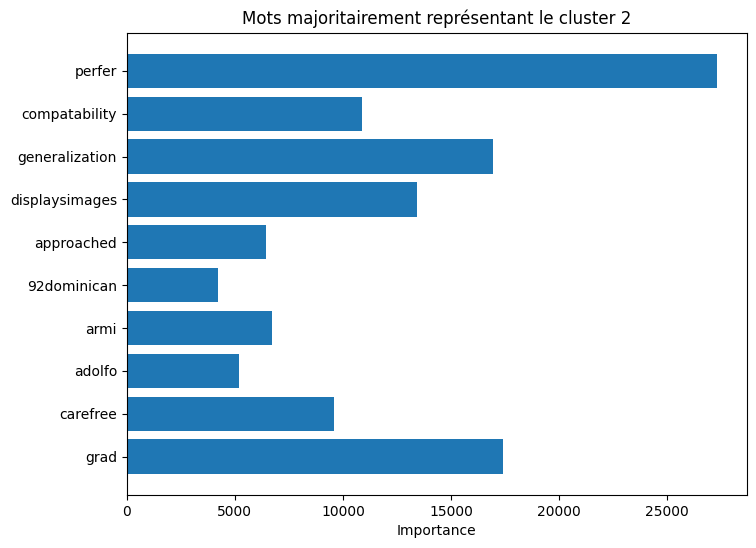

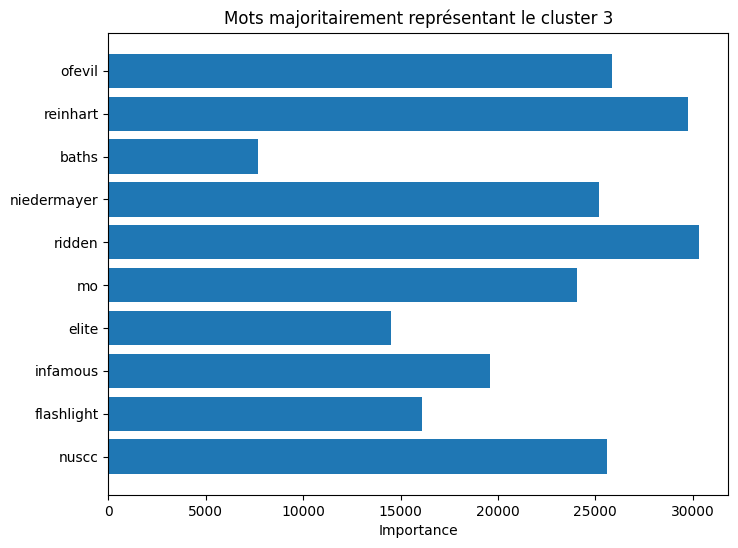

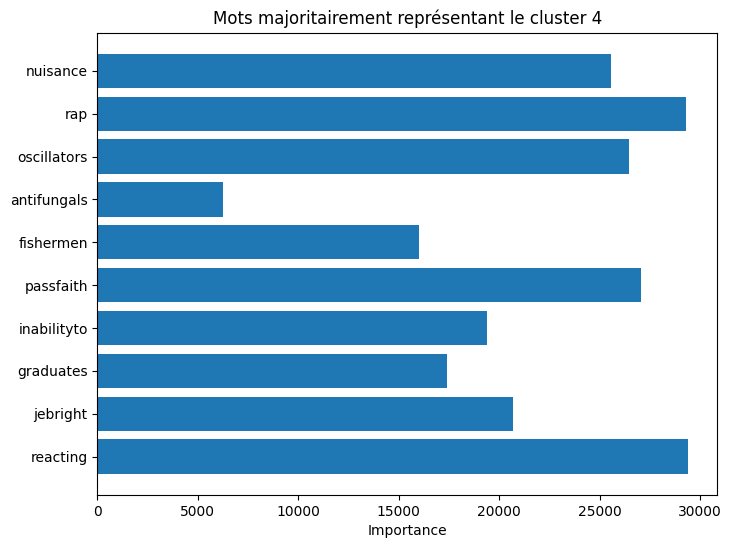

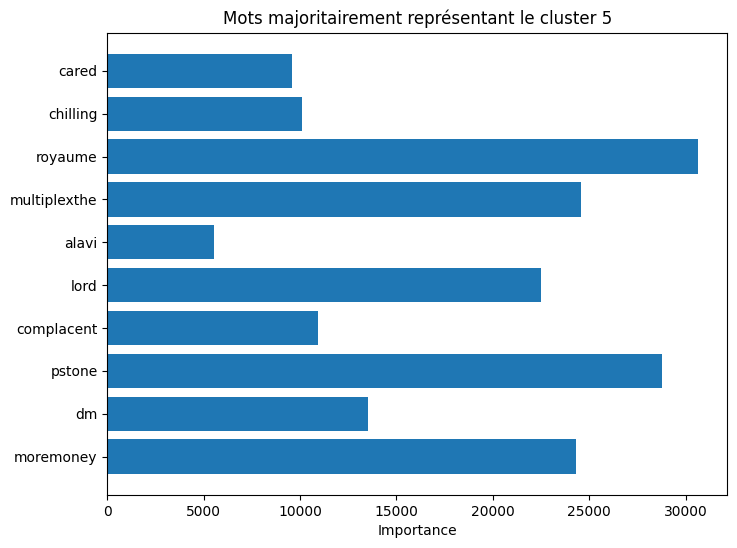

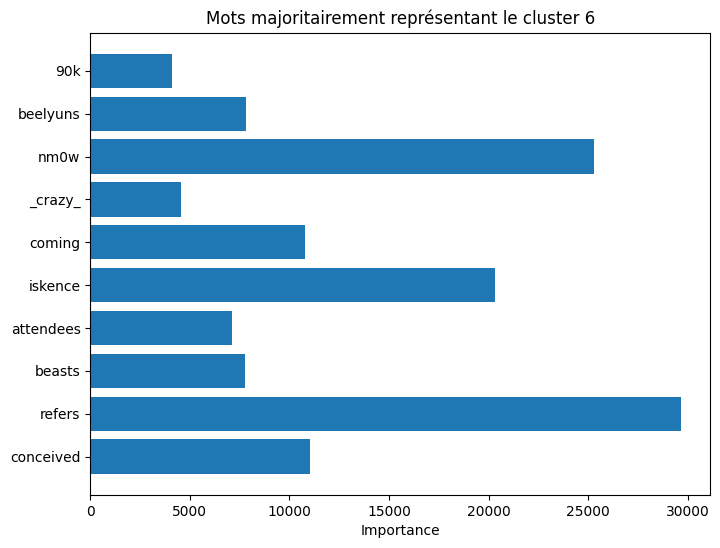

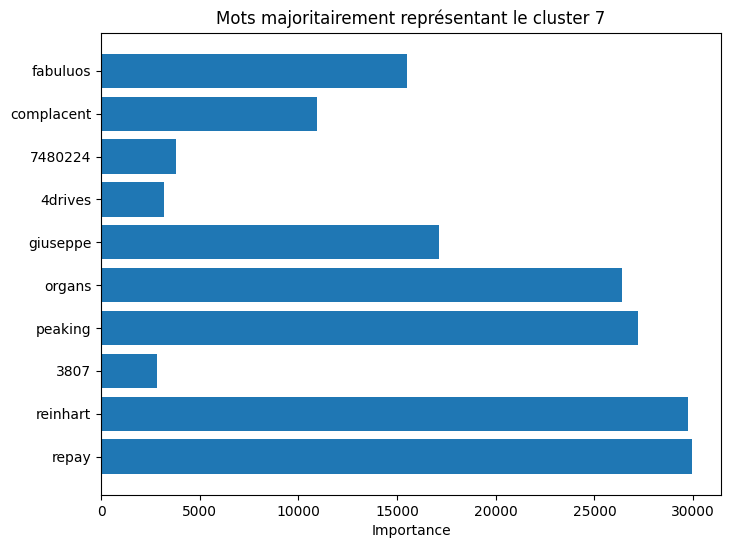

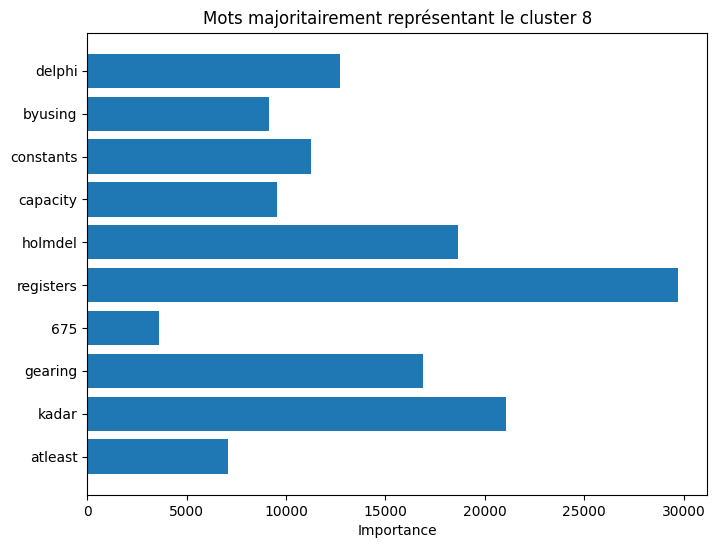

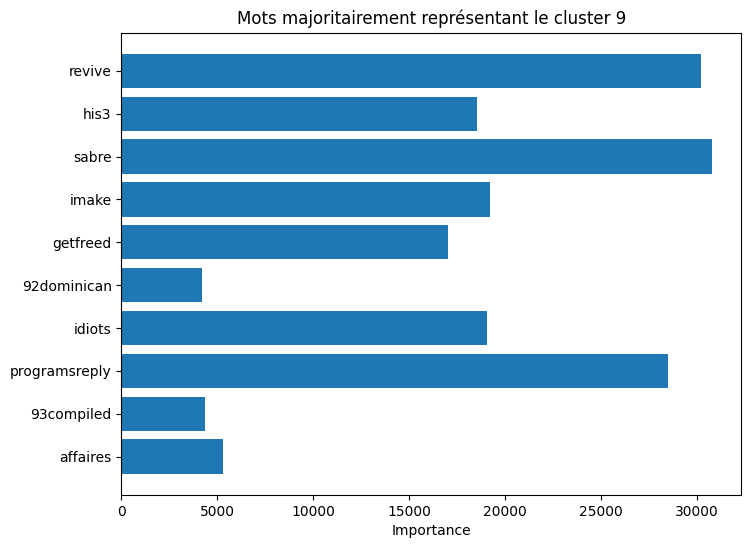

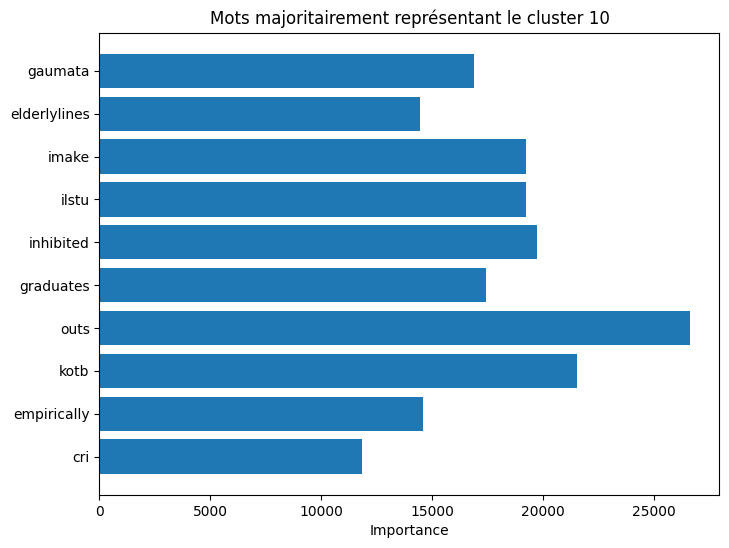

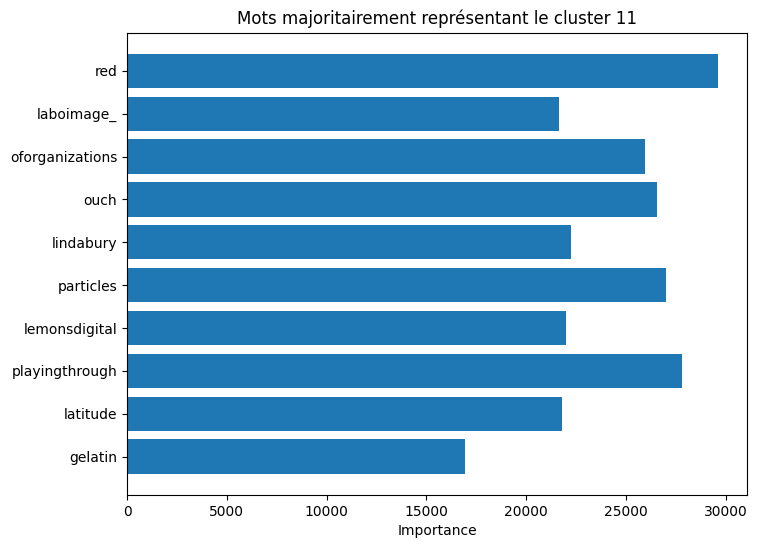

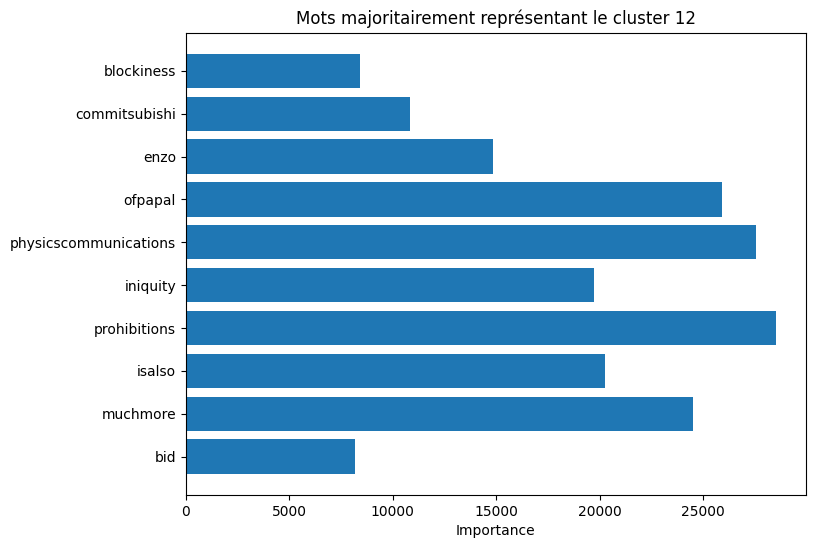

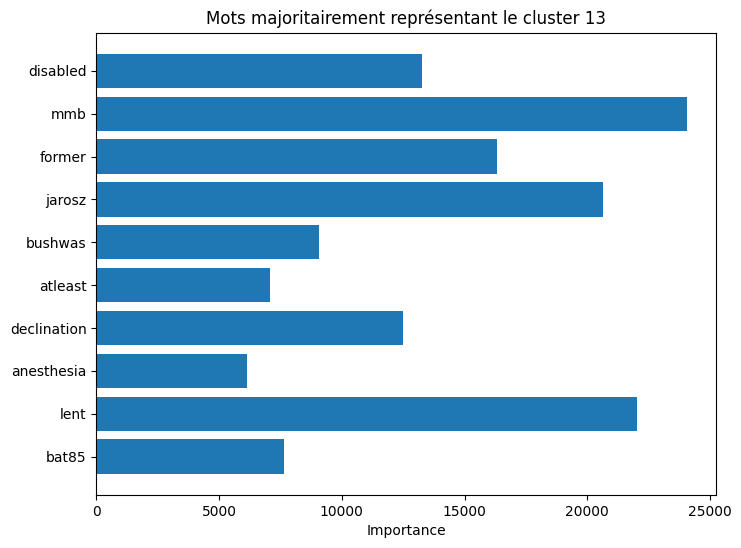

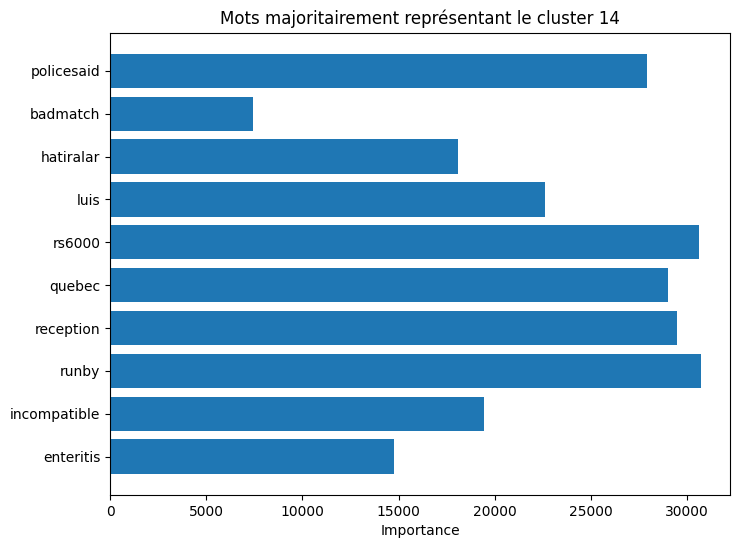

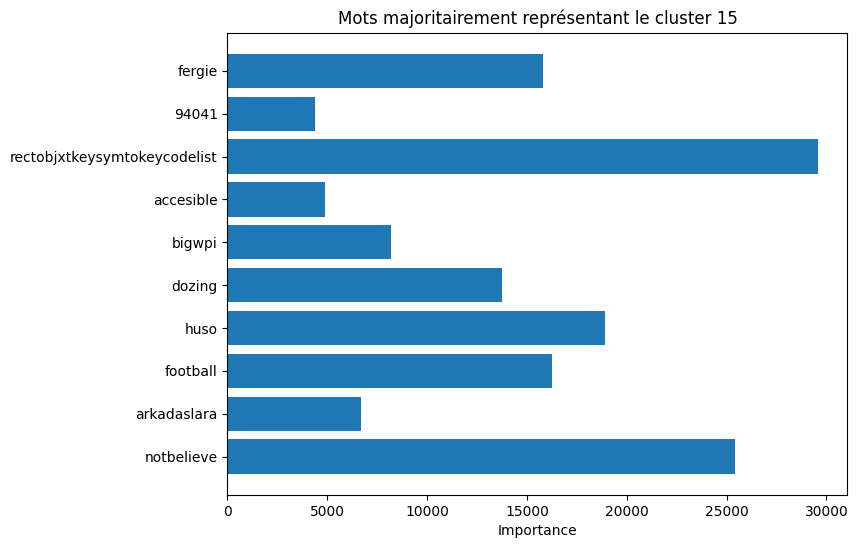

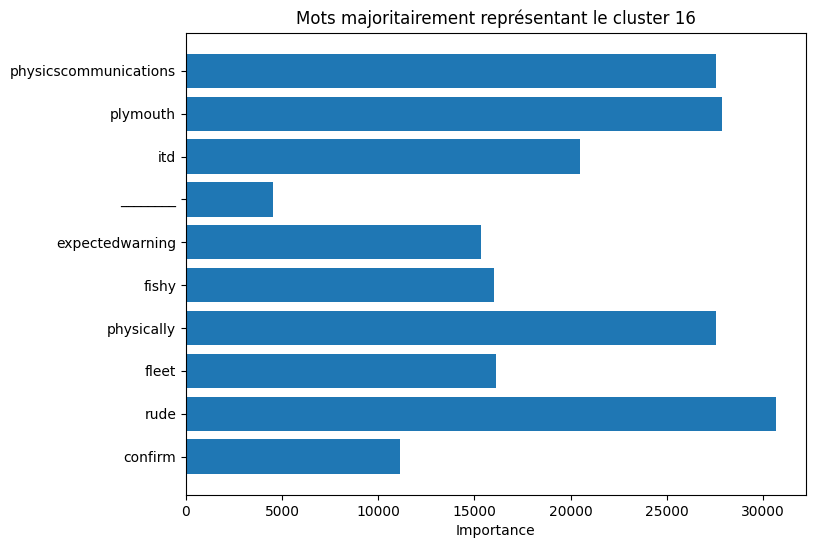

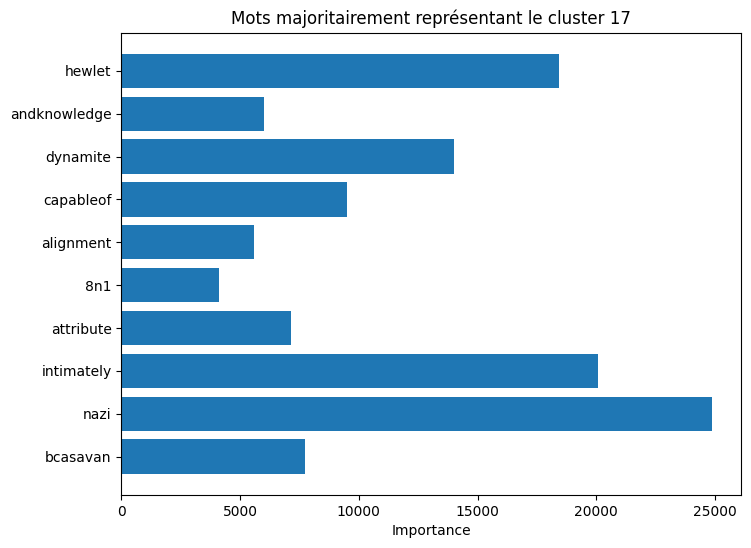

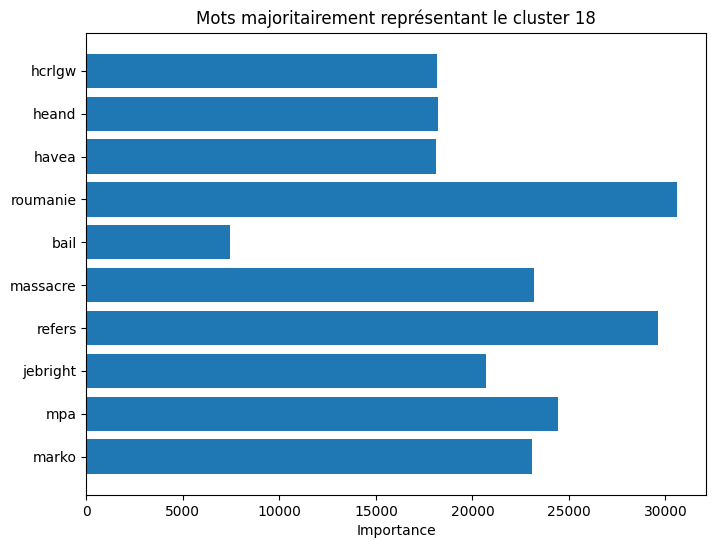

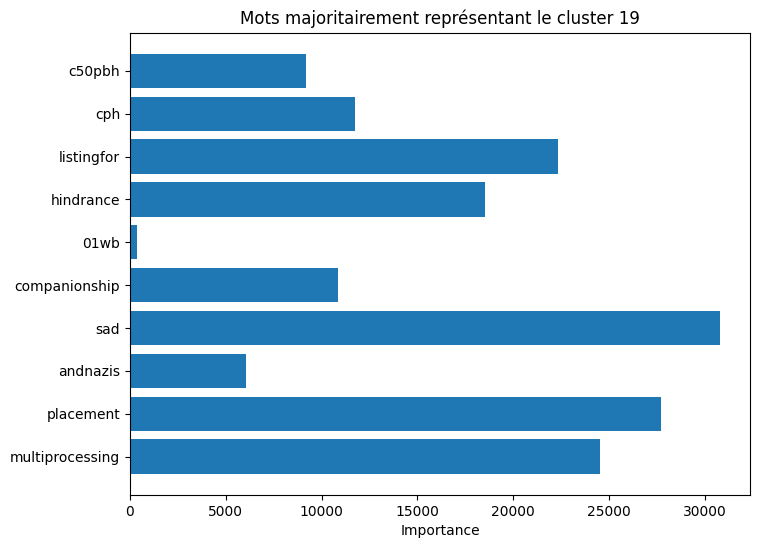

In [43]:
# Votre code pour obtenir les mots représentant chaque cluster

for index, topic in enumerate(lda.components_):
    top_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(top_words)), topic.argsort()[-10:])
    plt.yticks(range(len(top_words)), top_words)
    plt.xlabel('Importance')
    plt.title(f'Mots majoritairement représentant le cluster {index}')
    
    plt.show()

➡️ Utiliser une métrique vous paraissant pertinente pour évaluer les clusters identifiés par rapport aux labels existants des données. 

➡️ Commenter le score obtenu.

In [42]:
from sklearn.metrics.cluster import adjusted_rand_score

y_pred_clusters = []
for pred in y_pred_lda:
  y_pred_clusters.append(np.argmax(pred))

adjusted_rand_score(y_test_news, y_pred_clusters)

-3.8061601625014944e-05

### Commentaire
Un score d'indice de Rand ajusté de -3.8061601625014944e-05 indique une correspondance très faible ou presque inexistante entre les ensembles de clusters prédits et les étiquettes de vérité terrain.

